### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Παναγιώτης Κωνσταντίνος Κακκαβάς

Α.Μ.: 03120866

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pprint import pprint
from random import sample

In [ ]:
!pip install munkres
from munkres import Munkres


def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert (l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i, j] = -m_ij.size
    return m


def translate_clustering(clt, mapper):
    return np.array([mapper[i] for i in clt])


def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = {old: new for (old, new) in indexes}

    for old, new in mapper.items():
        print("map: %s --> %s" % (old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [16]:
img_gt = np.load('indian_pines_gt.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [17]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

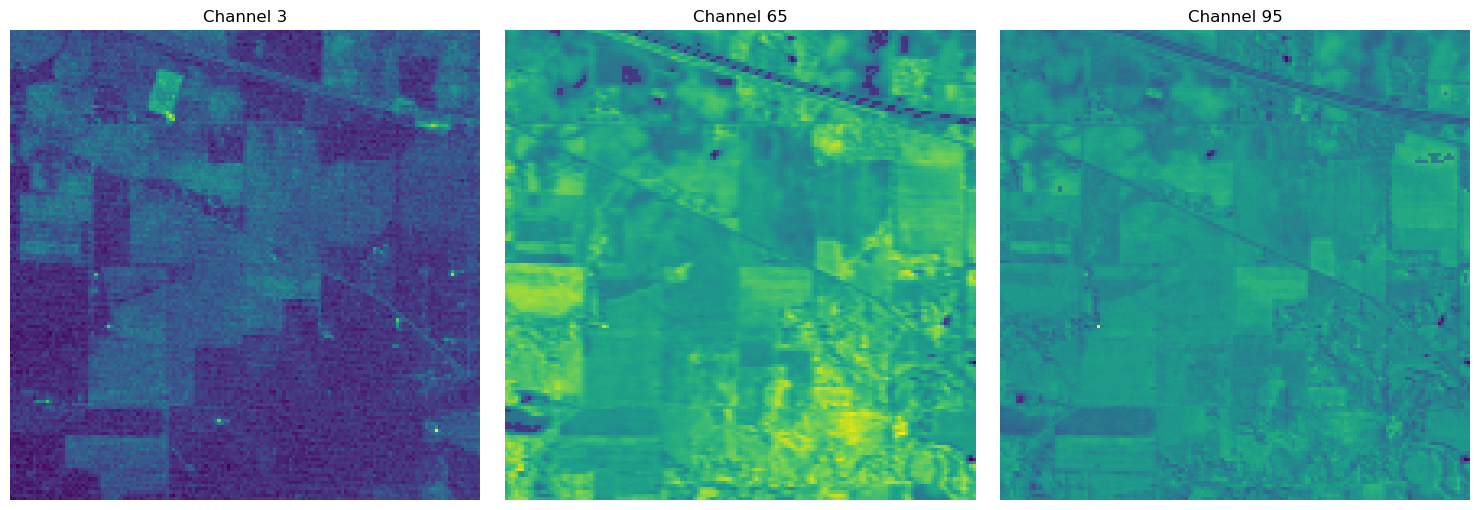

/tmp/ipykernel_291741/423458261.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', len(classes))


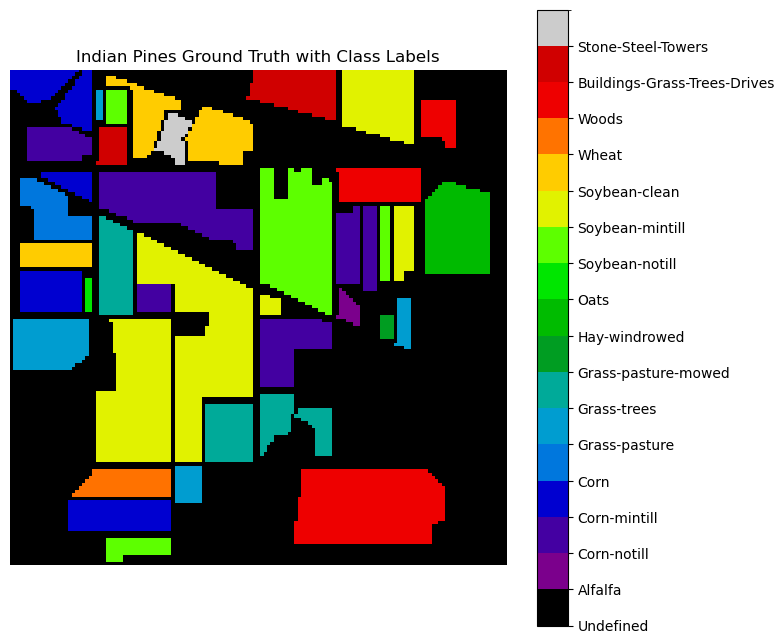

The hyperspectral images have shape (h,w,c):  (145, 145, 200)
The number of unique crops in the images (found by ground truth is):  17
{'Alfalfa': (46, '0.22%'),
 'Buildings-Grass-Trees-Drives': (386, '1.84%'),
 'Corn': (237, '1.13%'),
 'Corn-mintill': (830, '3.95%'),
 'Corn-notill': (1428, '6.79%'),
 'Grass-pasture': (483, '2.30%'),
 'Grass-pasture-mowed': (28, '0.13%'),
 'Grass-trees': (730, '3.47%'),
 'Hay-windrowed': (478, '2.27%'),
 'Oats': (20, '0.10%'),
 'Soybean-clean': (593, '2.82%'),
 'Soybean-mintill': (2455, '11.68%'),
 'Soybean-notill': (972, '4.62%'),
 'Stone-Steel-Towers': (93, '0.44%'),
 'Undefined': (10776, '51.25%'),
 'Wheat': (205, '0.98%'),
 'Woods': (1265, '6.02%')}


In [18]:
imgs = np.load('indian_pines_corrected.npy')

# 2b Each channel represents a different wavelength of the electromagnetic spectrum, capturing different information about the area imaged.
channels_to_plot = [3, 65, 95]
fig, axes = plt.subplots(1, len(channels_to_plot), figsize=(15, 5))
for i, channel in enumerate(channels_to_plot):
    ax = axes[i]
    ax.imshow(imgs[:, :, channel - 1])  # channel index is zero-based
    ax.set_title(f'Channel {channel}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# 2d Labeled Ground Truth
cmap = plt.cm.get_cmap('nipy_spectral', len(classes))
norm = mcolors.BoundaryNorm(range(len(classes) + 1), cmap.N)

plt.figure(figsize=(8, 8))
temp_img = plt.imshow(img_gt, cmap=cmap, norm=norm)
plt.axis('off')
plt.title('Indian Pines Ground Truth with Class Labels')

cbar = plt.colorbar(temp_img, ticks=np.arange(len(classes)))
cbar.ax.set_yticklabels(classes)

plt.show()

# 2a (h=145, w=145, channels=200)
print('The hyperspectral images have shape (h,w,c): ', imgs.shape)
# 2c img_gt contains all the numbers from 0 to 17 so all the 16 possible classes
print('The number of unique crops in the images (found by ground truth is): ', len(np.unique(img_gt)))
# 2e class:pixel dict
pixel_counts = {
    class_name: (np.sum(img_gt == class_index), "{:.2f}%".format(np.sum(img_gt == class_index) / (1.45 * 145))) for
    class_index, class_name in enumerate(classes)}
pprint(pixel_counts)


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

(21025, 200) (21025,)
{'pixel1': array([3156, 4254, 4053, 4033, 4154, 4378, 4425, 4207, 4200, 3957, 3841,
       3784, 3631, 3817, 3833, 3783, 3665, 2678, 3287, 3200, 3088, 3038,
       2932, 2819, 2820, 2694, 2596, 2606, 2541, 2438, 2649, 2343, 2537,
       3121, 2712, 4161, 5438, 6529, 6692, 4720, 6922, 7116, 6800, 6732,
       6294, 5650, 6130, 6603, 6452, 6525, 6352, 6392, 6248, 5151, 4885,
       4760, 4228, 2542, 2694, 2922, 3738, 4386, 4864, 5173, 5079, 5112,
       5062, 5069, 5028, 4960, 4806, 4736, 4632, 4416, 3879, 3142, 1840,
       1661, 1939, 1824, 2284, 2808, 2942, 2848, 2927, 2931, 2949, 3051,
       3117, 3125, 2984, 2707, 2757, 2857, 2718, 2881, 2846, 2669, 2381,
       2114, 1727, 1462, 1099, 1024, 1050, 1048, 1056, 1100, 1132, 1109,
       1142, 1241, 1362, 1437, 1501, 1543, 1567, 1592, 1606, 1571, 1580,
       1617, 1603, 1603, 1640, 1645, 1622, 1609, 1602, 1586, 1565, 1539,
       1503, 1475, 1455, 1399, 1366, 1355, 1319, 1259, 1198, 1128, 1063,
       1026,  997,

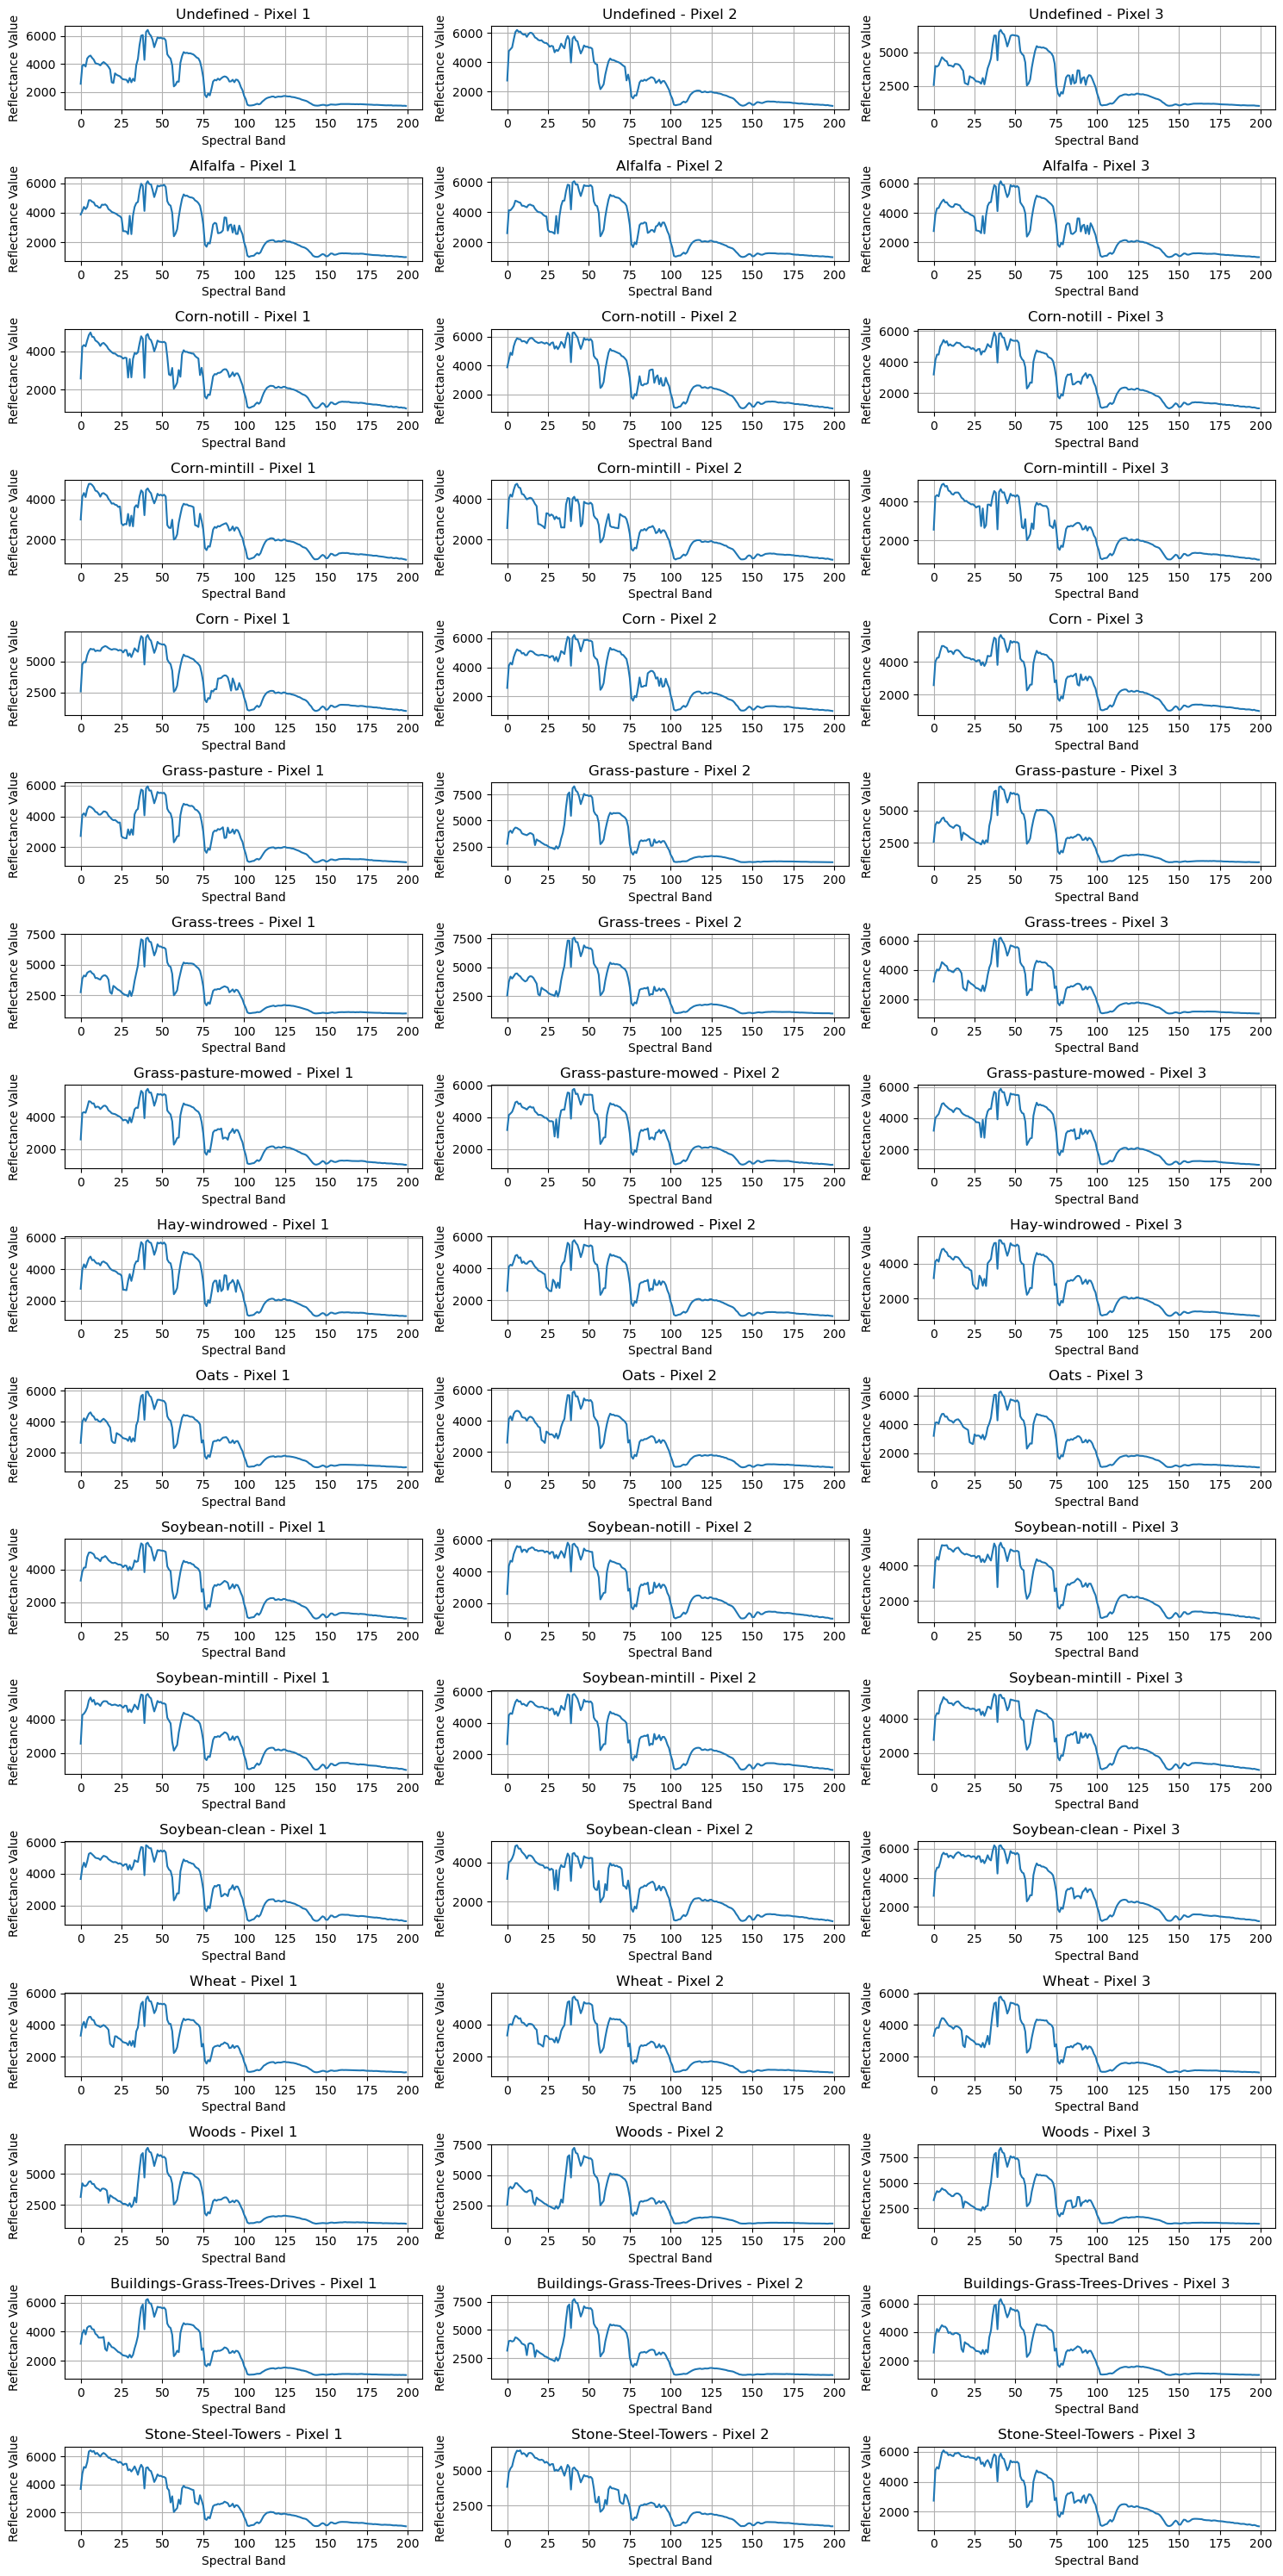

In [19]:
# 3a flatten the image
imgs, img_gt = np.reshape(imgs, (-1, 200)), np.reshape(img_gt, (-1))
print(imgs.shape, img_gt.shape)

# 3b, 3c, 3d dict of class: idx1-3: signature1-3 
hyperspectral_signatures = {}

for class_index, class_name in enumerate(classes):
    class_pixel_idxs = sample(list(np.where(img_gt == class_index)[0]), 3)

    hyperspectral_signatures[class_name] = {
        f"pixel{i + 1}": imgs[idx] for i, idx in enumerate(class_pixel_idxs)
    }

pprint(hyperspectral_signatures['Woods'])

# 3e plot each class's spectral signature
fig, axes = plt.subplots(nrows=len(classes), ncols=3, figsize=(15, 30))

for i, class_name in enumerate(classes):
    for j in range(3):
        pixel_signature = hyperspectral_signatures[class_name][f"pixel{j + 1}"]
        axes[i, j].plot(pixel_signature)
        axes[i, j].set_title(f"{class_name} - Pixel {j + 1}")
        axes[i, j].set_xlabel("Spectral Band")
        axes[i, j].set_ylabel("Reflectance Value")
        axes[i, j].grid(True)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#### **3f**
- We can clearly see that each pixel of the class has a different yet very similar signature with the others of it's class meaning that pixels **from the same class** have **similar signatures**
- We can also see that when we change class so does the form of the signature, **different class signatures differ** both in **form** and in **value** 

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, confusion_matrix

# Remove the undefined class (0) from the analysis
defined_indices = img_gt != 0
defined_imgs = imgs[defined_indices]
defined_img_gt = img_gt[defined_indices]

kmeans = KMeans(n_clusters=16, random_state=0)
cluster_labels = kmeans.fit_predict(defined_imgs)

translated_predicted_labels = translate_predicted_labels(cluster_labels, defined_img_gt - 1)

rand_score = adjusted_rand_score(defined_img_gt, cluster_labels)
silhouette_score_value = silhouette_score(defined_imgs, cluster_labels)
cm = confusion_matrix(defined_img_gt, translated_predicted_labels)
acc = accuracy(cm)

print("Rand Score:", rand_score)
print("Silhouette Score:", silhouette_score_value)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

/home/kostiskak/anaconda3/envs/ai_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 13
map: 2 --> 8
map: 3 --> 0
map: 4 --> 1
map: 5 --> 3
map: 6 --> 4
map: 7 --> 5
map: 8 --> 2
map: 9 --> 7
map: 10 --> 6
map: 11 --> 14
map: 12 --> 11
map: 13 --> 15
map: 14 --> 9
map: 15 --> 12
Rand Score: 0.20487145792545008
Silhouette Score: 0.2822834484654961
Accuracy: 0.12645136110840083
Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  44   1   0   0   0   0   0   0   0   0]
 [  9 292 273  62   0   2 116   1   6 126 241 299   1   0   0   0   0]
 [ 16  53 272  80   0   0  53   0   1 106 157  92   0   0   0   0   0]
 [  0  72   1  49   0   0  30   1  28   3   6  34  13   0   0   0   0]
 [  0   0   0  11 201  38   4  23  86   0   1   1   1 108   9   0   0]
 [  0   0   0   0   4 345   0   0  83   0   0   0 254  42   2   0   0]
 [  0   0   0   9   0   0   0  19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 366 112   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  

In [42]:
undefined = 145*145 - len(translated_predicted_labels)
translated_predicted_labels

array([ 9, 10, 10, ...,  3,  3,  3])

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;